# **Loading Sci-Kit's InBuilt IRIS Dataset**

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# **Importing Necessary Libraries**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Pariwse ScatterPlot of teh Dataset**

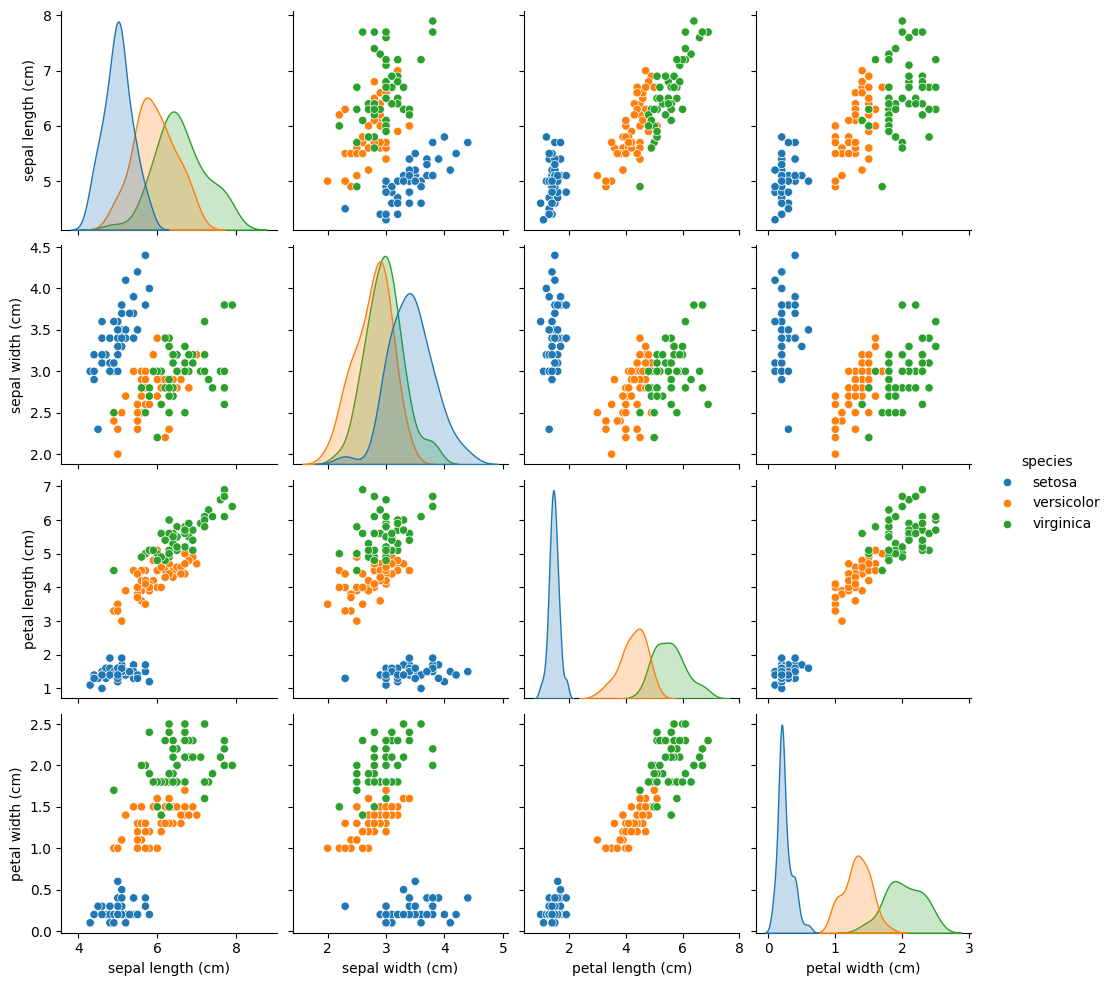

In [6]:
sns.pairplot(df, hue='species')
plt.show()

**Visible clear Separation of Iris --SETOSA-- from the other colors *

# **BASELINE Training for 5 models**

   ***Metrics Used on LR, DTREE, RF, KNN, SVM***  
**1. Accuracy**        
**2. Precision**    
**3. Recall (Sensitivity)**    
**4. F1 Score**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#(0.6 train, 0.4 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

#define classifiers
models = [
    ("Logistic Regression", LogisticRegression(max_iter=200)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(random_state=42))
]

#training each model + evaluation
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name}:")
    print(f"  Accuracy = {acc:.2f}, Precision = {prec:.2f}, Recall = {rec:.2f}, F1 = {f1:.2f}\n")


Logistic Regression:
  Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00

Decision Tree:
  Accuracy = 0.97, Precision = 0.96, Recall = 0.96, F1 = 0.96

Random Forest:
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

KNN:
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

SVM:
  Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00



# **Hyper - Parameter Tuning using GridSearchCV and RandomizedSearchCV**

In [20]:
import warnings
warnings.filterwarnings('ignore')

##Added later as Randomzied Search displayed recommendation to use the GridSearch only

## **1. GridSearchCV with 5 fold Cross-Validation**

In [15]:
from sklearn.model_selection import GridSearchCV

#param grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 2, 4, 6]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
}

for name, model in [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42))
]:
    grid = GridSearchCV(model, param_grids[name], cv=5)
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    y_pred = best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} (GridSearchCV) best params: {grid.best_params_}")
    print(f"  Accuracy = {acc:.2f}, Precision = {prec:.2f}, Recall = {rec:.2f}, F1 = {f1:.2f}\n")

Logistic Regression (GridSearchCV) best params: {'C': 1}
  Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00

Decision Tree (GridSearchCV) best params: {'max_depth': 4}
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

Random Forest (GridSearchCV) best params: {'max_depth': None, 'n_estimators': 50}
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

KNN (GridSearchCV) best params: {'n_neighbors': 3}
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

SVM (GridSearchCV) best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
  Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00



## **1. RandomizedSearchCV with 5 iterations per model**

In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_dists = param_grids  #reusing same values as distributions for simplicity

for name, model in [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42))
]:
    rand = RandomizedSearchCV(model, param_dists[name], n_iter=5, cv=5, random_state=42)
    rand.fit(X_train, y_train)
    best = rand.best_estimator_
    y_pred = best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} (RandomizedSearchCV) best params: {rand.best_params_}")
    print(f"  Accuracy = {acc:.2f}, Precision = {prec:.2f}, Recall = {rec:.2f}, F1 = {f1:.2f}\n")

Logistic Regression (RandomizedSearchCV) best params: {'C': 1}
  Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00

Decision Tree (RandomizedSearchCV) best params: {'max_depth': 4}
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

Random Forest (RandomizedSearchCV) best params: {'n_estimators': 50, 'max_depth': 10}
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

KNN (RandomizedSearchCV) best params: {'n_neighbors': 3}
  Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98

SVM (RandomizedSearchCV) best params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
  Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00



# **The Results Area**

In [ ]:
#to store results for each model and method
results = {
    "Model": [],
    "Method": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

#helper function to get results
def record_results(name, method, y_true, y_pred):
    results["Model"].append(name)
    results["Method"].append(method)
    results["Accuracy"].append(accuracy_score(y_true, y_pred))
    results["Precision"].append(precision_score(y_true, y_pred, average='macro'))
    results["Recall"].append(recall_score(y_true, y_pred, average='macro'))
    results["F1 Score"].append(f1_score(y_true, y_pred, average='macro'))

#store results from baseline models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    record_results(name, "Baseline", y_test, y_pred)

#GridSearchCV results
for name, model in [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42))
]:
    grid = GridSearchCV(model, param_grids[name], cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    record_results(name, "GridSearchCV", y_test, y_pred)

#RandomizedSearchCV results
for name, model in [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42))
]:
    rand = RandomizedSearchCV(model, param_grids[name], n_iter=5, cv=5, random_state=42)
    rand.fit(X_train, y_train)
    y_pred = rand.predict(X_test)
    record_results(name, "RandomizedSearchCV", y_test, y_pred)

#Creating a dataframe for the results
results_df = pd.DataFrame(results)

#table sorted by model name and method
results_df = results_df.sort_values(by=["Model", "Method"])
display(results_df.round(3))


In [28]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


from matplotlib import pyplot as plt
_df_18['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal width (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['petal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('petal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal width (cm)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal width (cm)'}, axis=1)
              .sort_values('petal width (cm)', ascending=True))
  xs = counted['petal width (cm)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

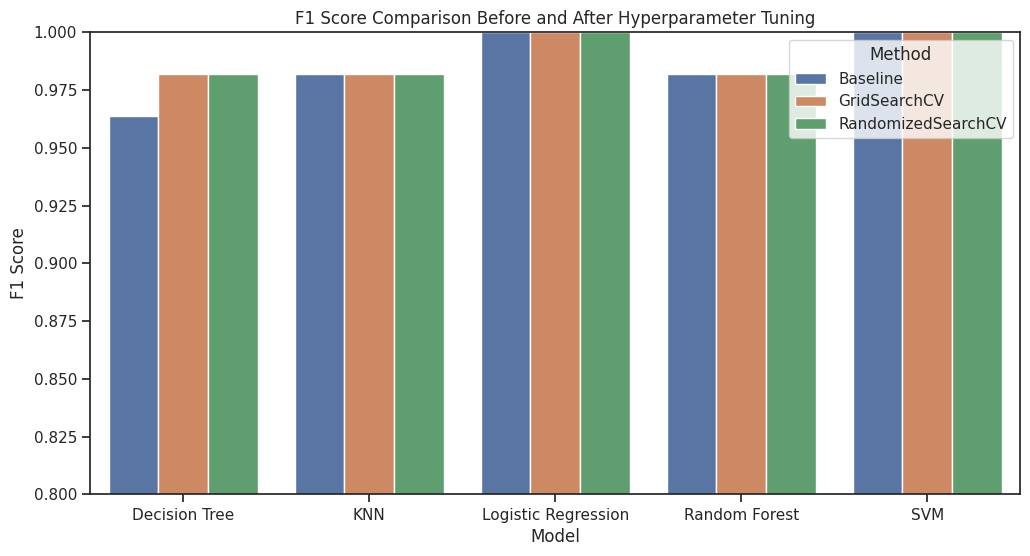

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x='Model', y='F1 Score', hue='Method')
plt.title("F1 Score Comparison Before and After Hyperparameter Tuning")
plt.ylim(0.8, 1.0)
plt.show()